## Import Libraries

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

## GLCM from scrtch (angle=0, distance=1)

In [2]:
def calc_glcm(image, level=256, distance=1):
    glcm = np.zeros((level, level))
    for i in range(gray_image.shape[1]-distance):
        for j in range(gray_image.shape[0]):
            this_level = gray_image[j, i]
            next_level = gray_image[j, i+distance]
            glcm[this_level, next_level] += 1
    return glcm

In [3]:
image = cv2.imread('Q2.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
glcm = calc_glcm(gray_image)

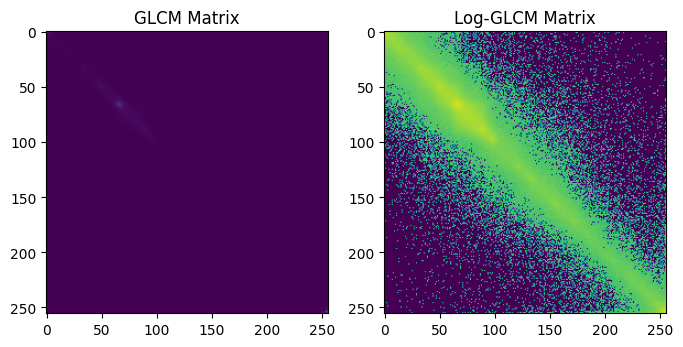

In [4]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(glcm)
plt.title('GLCM Matrix')
plt.subplot(1, 2, 2)
log_glcm = glcm.copy()
log_glcm[glcm == 0] = 1e-9
log_glcm = np.log(log_glcm)
plt.imshow(log_glcm)
plt.title('Log-GLCM Matrix')
plt.show()

In [6]:
glcm = glcm[:, :, np.newaxis, np.newaxis]
homogeneity = graycoprops(glcm, 'homogeneity')
dissimilarity = graycoprops(glcm, 'dissimilarity')
contrast = graycoprops(glcm, 'contrast')
asm = graycoprops(glcm, 'ASM')
correlation = graycoprops(glcm, 'correlation')
energy = graycoprops(glcm, 'energy')

print('Homogeneity:', homogeneity)
print('Dissimilarity:', dissimilarity)
print('Contrast:', contrast)
print('ASM:', asm)
print('Correlation:', correlation)
print('Energy:', energy)

Homogeneity: [[0.19106151]]
Dissimilarity: [[9.36953236]]
Contrast: [[320.20564209]]
ASM: [[0.0009456]]
Correlation: [[0.95725552]]
Entropy: [[0.0307506]]


## GLCM with Built-in Functions (angle=[0, pi/2, pi, 3*pi/3])

In [26]:
distance = [1]
angles = [0, np.pi/2, np.pi, 3*np.pi/2] # right, up, left, dowm

glcm = graycomatrix(gray_image, distances=distance, angles=angles, levels=256, symmetric=False)

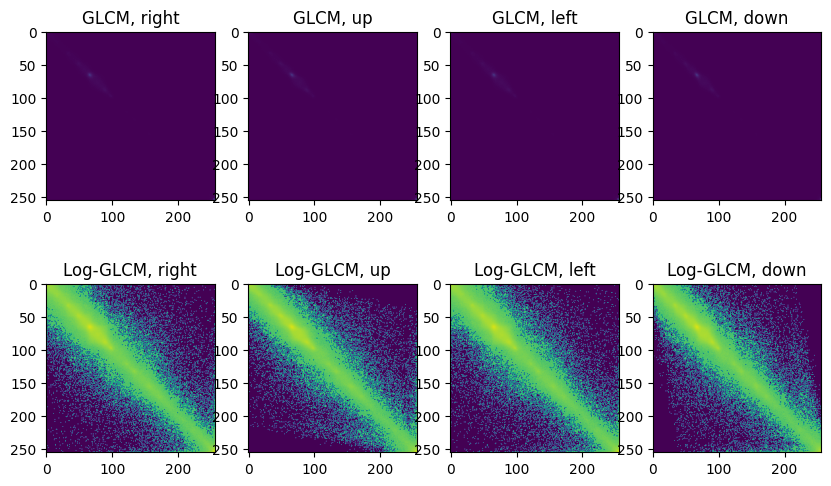

In [24]:
pos = ['right', 'up', 'left', 'down']
plt.figure(figsize=(10, 6))
for i in range(4):
    local_glcm = glcm[:, :, 0, i].copy()
    local_log_glcm = local_glcm.copy()
    local_log_glcm = np.log(local_log_glcm + 1e-9)
    plt.subplot(2, 4, i+1)
    plt.imshow(local_glcm)
    plt.title('GLCM, ' + pos[i])
    plt.subplot(2, 4, 4+i+1)
    plt.imshow(local_log_glcm)
    plt.title('Log-GLCM, ' + pos[i])

In [27]:
homogeneity = graycoprops(glcm, 'homogeneity')
dissimilarity = graycoprops(glcm, 'dissimilarity')
contrast = graycoprops(glcm, 'contrast')
asm = graycoprops(glcm, 'ASM')
correlation = graycoprops(glcm, 'correlation')
energy = graycoprops(glcm, 'energy')

print('Homogeneity:', homogeneity)
print('Dissimilarity:', dissimilarity)
print('Contrast:', contrast)
print('ASM:', asm)
print('Correlation:', correlation)
print('Energy:', energy)

Homogeneity: [[0.19106151 0.20773445 0.19106151 0.20773445]]
Dissimilarity: [[9.36953236 8.3983233  9.36953236 8.3983233 ]]
Contrast: [[320.20564209 267.77302241 320.20564209 267.77302241]]
ASM: [[0.0009456  0.00108321 0.0009456  0.00108321]]
Correlation: [[0.95725552 0.96428202 0.95725552 0.96428202]]
Energy: [[0.0307506  0.03291215 0.0307506  0.03291215]]
